# PCA a mano

El procedimiento consiste en:
    
    1. calcular las medias
    2. calcular la matriz de covarianza
    3. calcular los autovectores
    4. ordenar los autovectores
    5. transfomar los datos
    
Adicionalmente, veremos qué pasa en un conjunto de datos con etiquetas para ver cómo se "separan" en un subespacio.

In [51]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


### 1. Generar datos

In [19]:
np.random.seed(23423784) # fijar la semilla por consistencia

N = 20  # number of samples

In [53]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, N).T

mu_vec2 = np.array([1,1,4])
cov_mat2 = np.array([[1,0,0],[0,2,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, N).T
assert class2_sample.shape == (3,N), "The matrix has not the dimensions 3x20"

### 2. Visualizar los datos

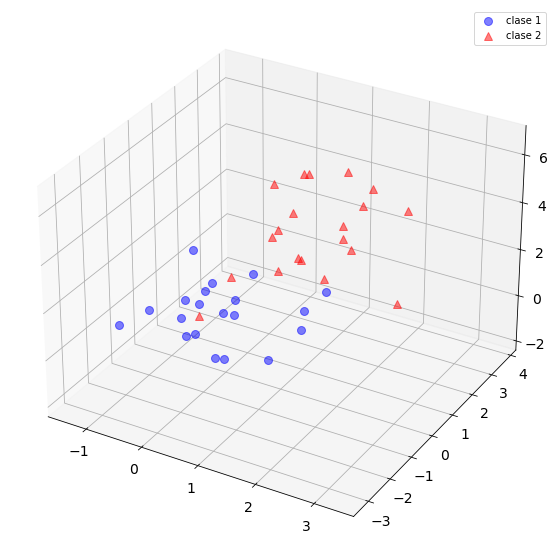

In [54]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='clase 1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='clase 2')
ax.legend(loc='upper right')

### 3. Calcular las medias

In [34]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,2*N), "The matrix has not the dimensions 3x40"

In [55]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('\nVector con las medias:\n', mean_vector)


Vector con las medias:
 [[0.67849458]
 [0.18109558]
 [1.91371068]]


### 4. Calcular la matriz de covarianza

In [36]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('\nMatrix de dispersión:\n', scatter_matrix)


Matrix de dispersión:
 [[ 60.39146521  -8.32395561  29.48084822]
 [ -8.32395561  61.0207761   10.66304806]
 [ 29.48084822  10.66304806 187.63396017]]


In [56]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('\nMatriz de covarianza:\n', cov_mat)


Matriz de covarianza:
 [[ 1.54849911 -0.21343476  0.75591919]
 [-0.21343476  1.56463528  0.27341149]
 [ 0.75591919  0.27341149  4.81112718]]


### 5. Calcular los autovectores y autovalores

In [42]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# autovalores y autovectores a partir de la matriz de covarianza
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print(f'Autovector {i+1}: \n{eigvec_sc}')
    print(f'Autovalor {i+1}: {eig_val_cov[i]}')
    print(40 * '-')

Autovector 1: 
[[-0.21013026]
 [-0.06473348]
 [-0.97552799]]
Autovalor 1: 4.992096228962895
----------------------------------------
Autovector 2: 
[[ 0.78031645]
 [ 0.59005054]
 [-0.20723559]]
Autovalor 2: 1.1863503242466393
----------------------------------------
Autovector 3: 
[[-0.5890259 ]
 [ 0.80476701]
 [ 0.07347488]]
Autovalor 3: 1.7458150231613476
----------------------------------------


In [57]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

### 6. Visualizar

/tmp/ipykernel_15773/2532315208.py:8: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


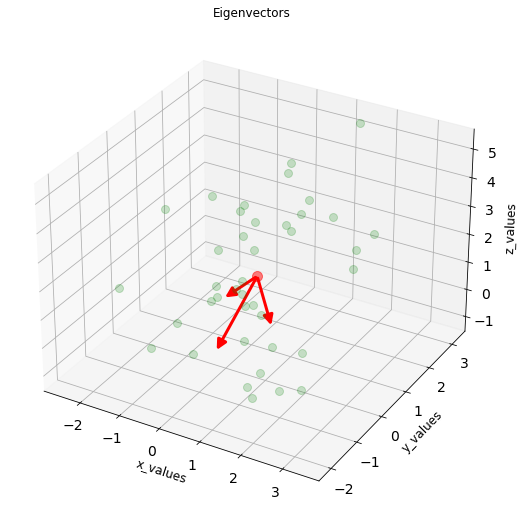

In [45]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [58]:
# verificar norma 1
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [60]:
# ordenar los autovalores

eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# check:
for i in eig_pairs:
    print(i[0])

194.69175292955305
68.08678590329255
46.26766264561887


### 7. Construir la transformación

In [48]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.21013026 -0.5890259 ]
 [-0.06473348  0.80476701]
 [-0.97552799  0.07347488]]


In [61]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,2*N), "The matrix is not 2x40 dimensional."

### 8. Visualizar la proyección de los datos en el subespacio de las componentes principales

Text(0.5, 1.0, '')

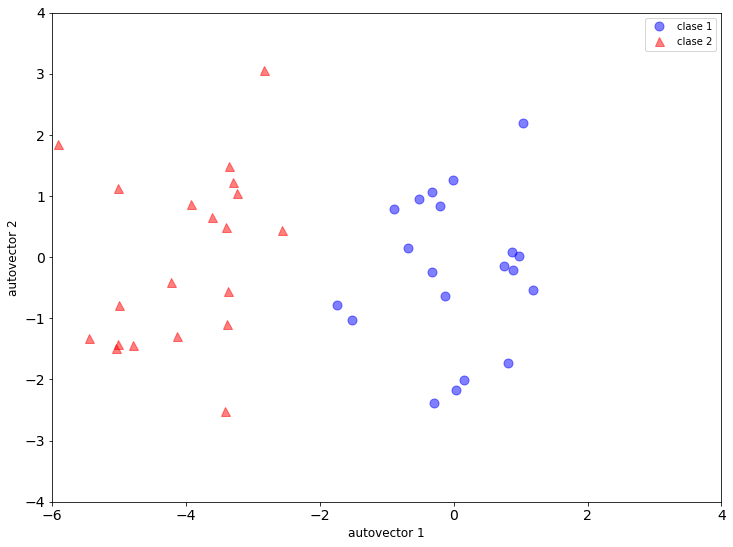

In [67]:
#plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
#plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

plt.plot(transformed[0,0:N], transformed[1,0:N], 'o', markersize=9, color='blue', alpha=0.5, label='clase 1')
plt.plot(transformed[0,N:(2*N)], transformed[1,N:(2*N)], '^', markersize=9, color='red', alpha=0.5, label='clase 2')

plt.xlim([-6,4])
plt.ylim([-4,4])
plt.xlabel('autovector 1')
plt.ylabel('autovector 2')
plt.legend()
plt.title('')